# What things we conver in this notebook

1.Access pixel values and modify them

2.Access image properties

3.Setting Region of Image (ROI)

4.Splitting and Merging images


In [2]:
# import google libraries
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
image_path=("/content/drive/My Drive/Computer vision/images/lena.jpg")

In [0]:
# Import library
import numpy as np
import cv2

In [0]:
# Accessing and Modifying pixel values
img = cv2.imread(image_path)

# You can access a pixel value by its row and column coordinates. For BGR image, it returns an array of Blue, Green, Red values. For grayscale image, just corresponding intensity is returned



In [6]:
px = img[100,100]
px

array([ 87,  74, 182], dtype=uint8)

In [7]:
# # accessing only blue pixel
blue = img[100,100,0]
blue

87

In [8]:
# You can modify the pixel values the same way.
img[100,100] = [255,255,255]
img[100,100]

array([255, 255, 255], dtype=uint8)

In [9]:
# Better pixel accessing and editing method :
img.item(10,10,2)

228

In [10]:
## modifying RED value
img.itemset((10,10,2),100)
img.item(10,10,2)

100

# Accessing Image Properties



In [11]:
# find the image shape
# # If image is grayscale, tuple returned contains only number of rows and columns. So it is a good method to check if loaded image is grayscale or color image.
# 3 means BGR
# 1 means Gray

## number of rows, columns and channels (if image is color):
print(img.shape)

(512, 512, 3)


In [12]:

# Image size
print(img.size)

786432


In [13]:
# img.dtype is very important while debugging because a large number of errors in OpenCV-Python code is caused by invalid datatype.
#  Image datatype
print(img.dtype)

uint8


# ROI

Sometimes, you will have to play with certain region of images

In [0]:
# ROI is again obtained using Numpy indexing. Here I am selecting the ball and copying it to another region in the image
ball = img[280:340, 330:390]
ball

In [0]:
img[273:333, 100:160] = ball



In [0]:
img[273:333, 100:160]

Below image you can see the ROI, Only ball is ROI images

region x1, y1 and x2 and y2  rectangle box x1 top bottom, y1 left and x2 right anad y2 bottom
 

![alt text](https://opencv-python-tutroals.readthedocs.io/en/latest/_images/roi.jpg)

# Splitting and Merging Image Channels

In [0]:
# The B,G,R channels of an image can be split into their individual planes when needed
# Then, the individual channels can be merged back together to form a BGR image again

b,g,r = cv2.split(img)

img = cv2.merge((b,g,r))

In [0]:
b,g,r

In [0]:
b = img[:,:,0]
img[:,:,2] = 0

In [20]:
img[:,:,2]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

# Making Borders for Images (Padding)

src - input image

top, bottom, left, right - border width in number of pixels in corresponding directions

borderType - Flag defining what kind of border to be added. It can be following types:

cv2.BORDER_CONSTANT - Adds a constant colored border. The value should be given as next argument.

cv2.BORDER_REFLECT - Border will be mirror reflection of the border elements, like this : fedcba|abcdefgh|hgfedcb

cv2.BORDER_REFLECT_101 or cv2.BORDER_DEFAULT - Same as above, but with a slight change, like this : gfedcb|abcdefgh|gfedcba

cv2.BORDER_REPLICATE - Last element is replicated throughout, like this: aaaaaa|abcdefgh|hhhhhhh

cv2.BORDER_WRAP - Can’t explain, it will look like this : cdefgh|abcdefgh|abcdefg

value - Color of border if border type is cv2.BORDER_CONSTANT

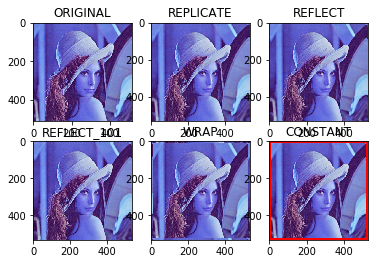

In [21]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

BLUE = [255,0,0]

img1 = cv2.imread(image_path)

replicate = cv2.copyMakeBorder(img1,10,10,10,10,cv2.BORDER_REPLICATE)
reflect = cv2.copyMakeBorder(img1,10,10,10,10,cv2.BORDER_REFLECT)
reflect101 = cv2.copyMakeBorder(img1,10,10,10,10,cv2.BORDER_REFLECT_101)
wrap = cv2.copyMakeBorder(img1,10,10,10,10,cv2.BORDER_WRAP)
constant= cv2.copyMakeBorder(img1,10,10,10,10,cv2.BORDER_CONSTANT,value=BLUE)

plt.subplot(231),plt.imshow(img1,'gray'),plt.title('ORIGINAL')
plt.subplot(232),plt.imshow(replicate,'gray'),plt.title('REPLICATE')
plt.subplot(233),plt.imshow(reflect,'gray'),plt.title('REFLECT')
plt.subplot(234),plt.imshow(reflect101,'gray'),plt.title('REFLECT_101')
plt.subplot(235),plt.imshow(wrap,'gray'),plt.title('WRAP')
plt.subplot(236),plt.imshow(constant,'gray'),plt.title('CONSTANT')

plt.show()